In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

# Airbnb Seattle Analysis

This is the project of Udacity's data scientist nanodegree program

## Analysis Airbnb Seattle Data By CRISP-DM Process
CRISP-DM  process(Cross-Industry Standard Process for Data Mining): is a process model describing the life cycle of data science. In short, it guides you through the entire phases of planning, organizing, and implementing your data mining project.
## CRISP-DM process majors.

1-Business Understanding

2-Data Understanding

3-Data Preparation

4-Modeling

5-Evaluation

6-Deployment

### 1-Business Understanding
An Airbnb is a residential property that hosts rent on a short term basis to travelers. It can be anything from a house, a single room, a boat or even a tree house. Think of it as pop-up accommodation – a market place where people rent out their properties.


after I understand the busness I considered three below questions to explore its way.

1-When do reservations increase in Seattle?

2-If bookings increase is prices increase ?

3-what's the room prices based on neighborhoods ?

We can be able to answer these questions by analysing Airbnb dataset.


### 2-Data Understanding
We have three  Airbnb dataset:

1-Listings, including full descriptions and average review score

2- including unique id for each reviewer and detailed comments

3-Calendar, including listing id and the price and availability for that day


In [33]:
calendar = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/calendar.csv')
listings = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/listings.csv')
reviews = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/reviews.csv')


In [3]:
calendar.columns


Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [36]:
calendar['price'] = calendar['price'].str.replace('[$,]', '',regex=True)


calendar['price'] = pd.to_numeric(calendar['price'])
calendar['date']=pd.to_datetime(calendar['date'])


In [37]:
calendar_dropna = calendar.dropna(axis=0)
calendar_dub=calendar_dropna.drop_duplicates(keep = 'first')

In [38]:
calendar_dub['cnt']=1
calendar_group= calendar_dub.groupby(['date'], as_index=False)['price'].mean()

In [39]:
calendar_group2= calendar_dub.groupby(['date'], as_index=False)['cnt'].sum()


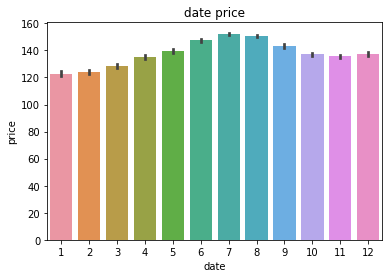

In [40]:
calendar_group.dtypes
month = calendar_group.date.dt.month.unique()

sns.barplot(x=calendar_group.date.dt.month,y=calendar_group['price']);
plt.title('date price');



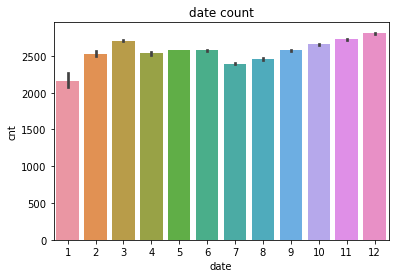

In [41]:
sns.barplot(x=calendar_group2.date.dt.month,y=calendar_group2['cnt']);
plt.title('date count');



In [58]:
listings = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/listings.csv')

listings.columns
listings.head()
listings.describe
listings_dropna = listings.dropna(axis=0)
listings['price'] = listings['price'].str.replace('[$,]', '',regex=True)
listings['price'] = pd.to_numeric(listings['price'])


listings2=listings[['host_neighbourhood','room_type','bedrooms','price','neighbourhood']]

# listings2['price'] = listings2['price'].str.replace('[$,]', '',regex=True)
# listings2['price'] = pd.to_numeric(listings2['price'])





In [60]:
listings2_group= listings2.groupby(['neighbourhood'], as_index=False)['price'].mean()
listings2_group= listings2_group[listings2_group['price'] > 160]


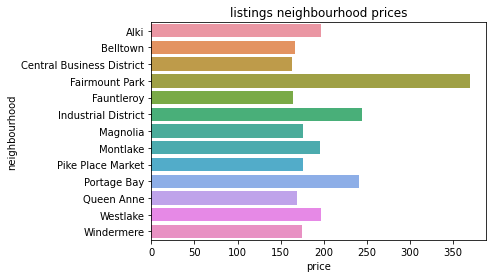

In [74]:
sns.barplot(x=listings2_group['price'],y=listings2_group['neighbourhood'],);
plt.title('listings neighbourhood prices');


In [79]:

X = listings[['room_type','bedrooms','neighbourhood']]
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 


In [81]:

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
# pipe.fit(X_train, y_train)
        
# #Predict and score the model
# y_test_preds = lm_model.predict(X_test) 

ValueError: could not convert string to float: 'Private room'